In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess data
data = load_iris()
X = data.data
y = pd.get_dummies(data.target).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

def initialize_weights(layer_sizes, seed=None):
    if seed is not None:
        np.random.seed(seed)
    weights = []
    for i in range(len(layer_sizes)-1):
        W = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.5
        weights.append(W)
    return weights

class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.1, seed=None):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = initialize_weights(layer_sizes, seed)
        self.results = pd.DataFrame(columns=["mse", "accuracy"])

    def feedforward(self, X):
        activations = [X]
        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i])
            a = sigmoid(z)
            activations.append(a)
        return activations

    def backpropagate(self, activations, y_true):
        deltas = []
        # Output layer delta
        error = activations[-1] - y_true
        delta = error * activations[-1] * (1 - activations[-1])
        deltas.insert(0, delta)

        # Hidden layers delta
        for i in reversed(range(len(self.weights)-1)):
            delta = np.dot(deltas[0], self.weights[i+1].T) * activations[i+1] * (1 - activations[i+1])
            deltas.insert(0, delta)

        return deltas

    def train(self, X_train, y_train, iterations=1000):
        N = X_train.shape[0]
        for itr in range(iterations):
            # Feedforward
            activations = self.feedforward(X_train)

            # Calculate error
            mse = mean_squared_error(activations[-1], y_train)
            acc = accuracy(activations[-1], y_train)
            self.results.loc[len(self.results)] = {"mse": mse, "accuracy": acc}

            # Backpropagation
            deltas = self.backpropagate(activations, y_train)

            # Update weights
            for i in range(len(self.weights)):
                grad = np.dot(activations[i].T, deltas[i]) / N
                self.weights[i] -= self.learning_rate * grad

        return self.weights, self.results

    def predict(self, X):
        activations = self.feedforward(X)
        return activations[-1]


In [ ]:
# Define network architecture (input_size, hidden_layers..., output_size)
layer_sizes = [4, 10, 10, 3]  # 4 input, 2 hidden layers with 10 neurons, 3 output

# Initialize and train network
nn = NeuralNetwork(layer_sizes, learning_rate=0.1, seed=10)
weights, results = nn.train(X_train, y_train, iterations=10000)

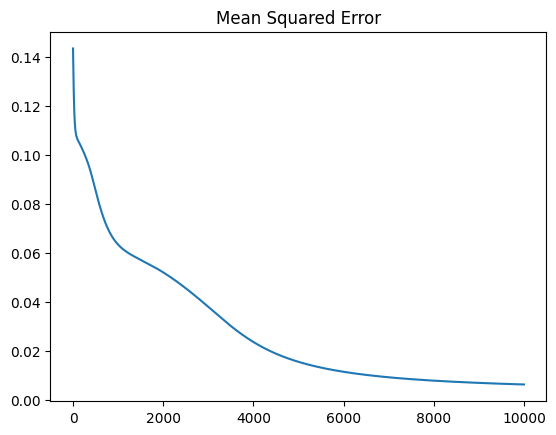

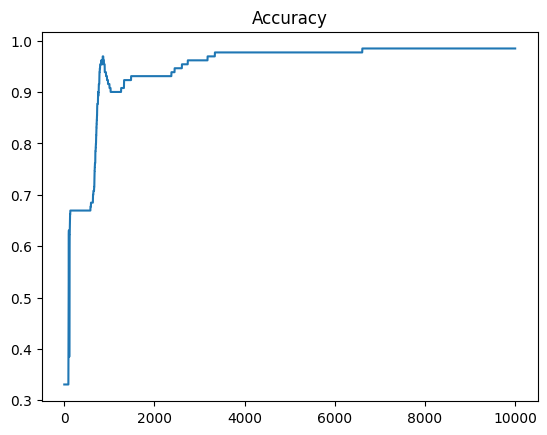

In [ ]:
# Plot results
results.mse.plot(title="Mean Squared Error")
plt.show()
results.accuracy.plot(title="Accuracy")
plt.show()

In [ ]:
# Test predictions
y_pred = nn.predict(X_test)
acc = accuracy(y_pred, y_test)
print(f"Test Accuracy: {acc}")

Test Accuracy: 0.95
